# Descriptive statistics and PCA Analysis for mtcars in Python

In [1]:
# toolboxes/libraries
import pandas as pd
import numpy as np
import scipy as sp
from sklearn import linear_model
import scipy.stats as stats
# Visualization libraries

import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
sns.set(color_codes=True)  # sets the background theme of the plot

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
mtcars=pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
type(mtcars)

pandas.core.frame.DataFrame

In [3]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [5]:
mtcars.rename(columns={"Unnamed: 0":"model"},inplace=True)

In [6]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
# check NA
mtcars.isna().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [9]:
mtcars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [10]:
# examine duplicated rows
# keep='first'
# mark duplicates as True except for the first occurence
mtcars.loc[mtcars.duplicated(keep="first"),:]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb


Text(0.5, 1.0, 'Weight vs MPG')

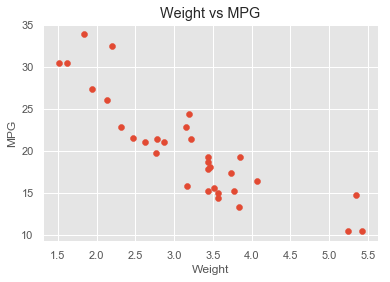

In [11]:
# Plotting data
plt.scatter(mtcars['wt'], mtcars['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight vs MPG')

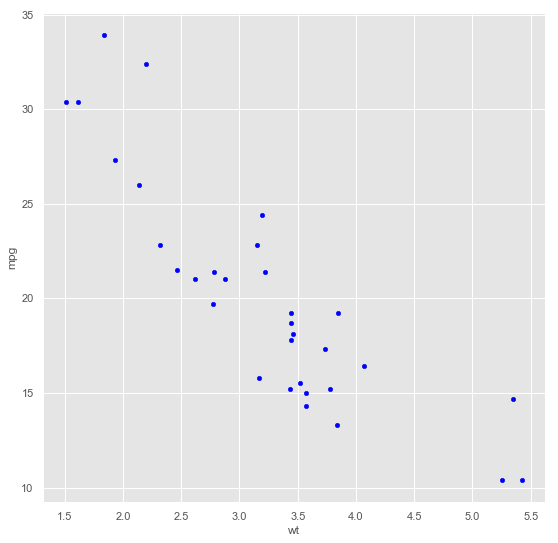

In [12]:
mtcars.plot(kind="scatter", x="wt", y="mpg", figsize=(9,9), color="blue")

Simple Linear Regression

Linear regression is used to fit the best line to the data. 
https://miamioh.instructure.com/courses/38817/pages/regression

In [13]:
# Create linear regression object
lm = linear_model.LinearRegression()                                           # Regression object created
lmFit = lm.fit(pd.DataFrame(mtcars['wt']), mtcars['mpg'])

print('Coefficients: \n', lmFit.coef_, '    ', lmFit.intercept_)    # Coefficients shown

# Check trained model y-intercept
#print(lmFit.intercept_)

# Check trained model coefficients
#print(lmFit.coef_)
 

Coefficients: 
 [-5.34447157]      37.28512616734204


It can be seen that the slope is about -5.3445 and the intercept is about 37.2851, making the equation is 
mpg = -5.3445wt + 37.28513

In [14]:
# We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:
lm.score(X = pd.DataFrame(mtcars['wt']), y = mtcars['mpg'])

0.7528327936582646

The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, car weight explains roughly 75% of the variance in mpg.

The R-squared measure is based on the residuals: differences between what the model predicts for each data point and the actual value of each data point. We can extract the model's residuals by making a prediction with the model on the data and then subtracting the actual value from each prediction:

In [15]:
train_prediction = lm.predict(X = pd.DataFrame(mtcars['wt']))

# Actual - prediction = residuals
residuals = mtcars['mpg'] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -5.107026e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64


R-squared is calculated as 1 - (SSResiduals/SSTotal) were SSResiduals is the sum of the squares of the model residuals and SSTotal is the sum of the squares of the difference between each data point and the mean of the data. We could calculate R-squared by hand like this:


In [16]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

In [17]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
#we can use R style formulas:
results = smf.ols('mpg ~ wt', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           1.29e-10
Time:                        23:24:28   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we have a linear model, let's plot the line it fits on our scatterplot to get a sense of how well it fits the data:

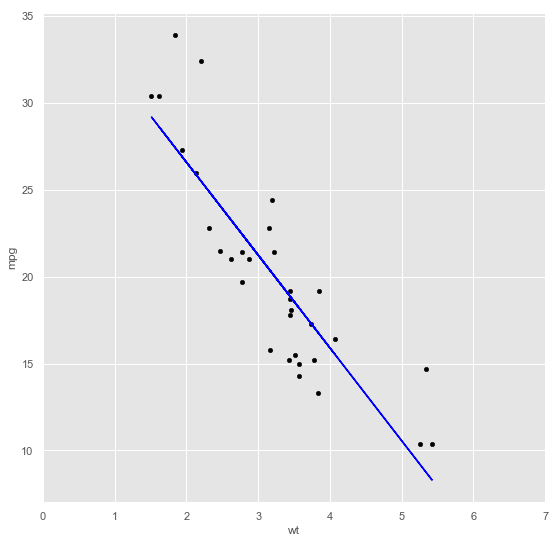

In [18]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

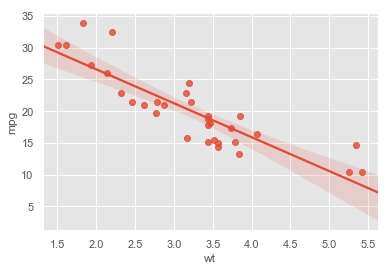

In [19]:
## Plot and run a simple linear regression
sns.regplot(mtcars.wt, mtcars.mpg)

Text(0.5, 1.0, 'Scatterplot with 99% confidence region')

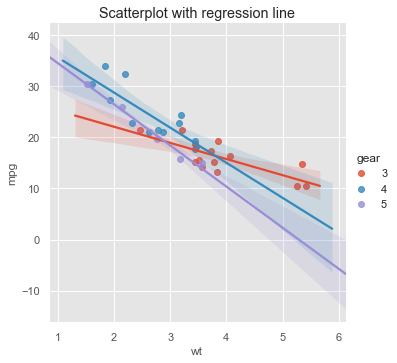

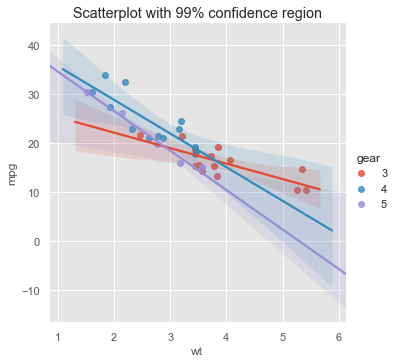

In [20]:
# http://www.photo.etangkk.com/Python/blog-07.asp
sns.lmplot(x="wt", y="mpg", hue="gear", data=mtcars)
plt.title('Scatterplot with regression line')

sns.lmplot(x="wt", y="mpg", hue="gear", data=mtcars, ci=99)
plt.title('Scatterplot with 99% confidence region')

as car weight increases we would expect fuel economy to decline.

In a well-behaved linear regression model, we'd like the residuals to be roughly normally distributed. That is, we'd like a roughly even spread of error above and below the regression line. We can investigate the normality of residuals with a Q-Q (quantile-quantile) plot. Make a qqplot by passing the residuals to the stats.probplot() function in the scipy.stats library:

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.032779748945897, -4.8544962703334

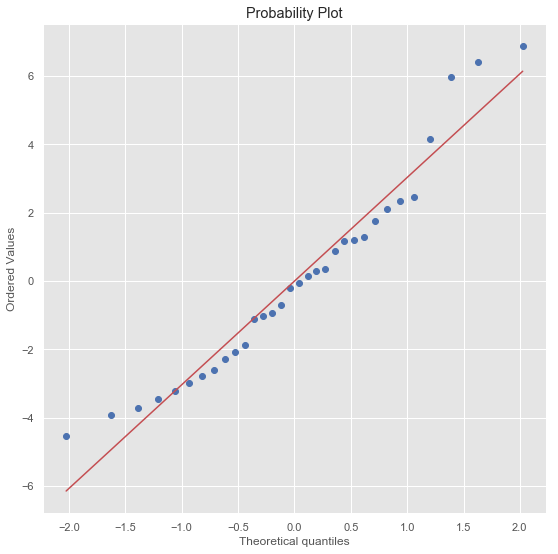

In [21]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt)

When residuals are normally distributed, they tend to lie along the straight line on the Q-Q plot. In this case residuals appear to follow a slightly non-linear pattern: the residuals are bowed a bit away from the normality line on each end. This is an indication that simple straight line might not be sufficient to fully describe the relationship between weight and mpg.

After making model predictions, it is useful to have some sort of metric to evaluate oh well the model performed. Adjusted R-squared is one useful measure, but it only applies to the regression model itself: we'd like some universal evaluation metric that lets us compare the performance of different types of models. Root mean squared error (RMSE) is a common evaluation metric for predictions involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.). 

In [22]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028


## Polynomial Regression
Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-27-linear.html

In [23]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           # Include weight
                           mtcars["wt"]**2]).T     # Include weight squared

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
49.930810949451796
Model Coefficients
[-13.38033708   1.17108689]


0.8190613581384094


The output shows us that including the weight squared term appears to improve the model's performance because the R-squared increased from 0.75 to 0.8190. It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.

Let's plot the curved line defined by the new model to see if the fit looks better than the old one. To start off, let's create a function that takes an array of x values, model coefficients and an intercept term and returns the x values and fitted y values corresponding to those x values.

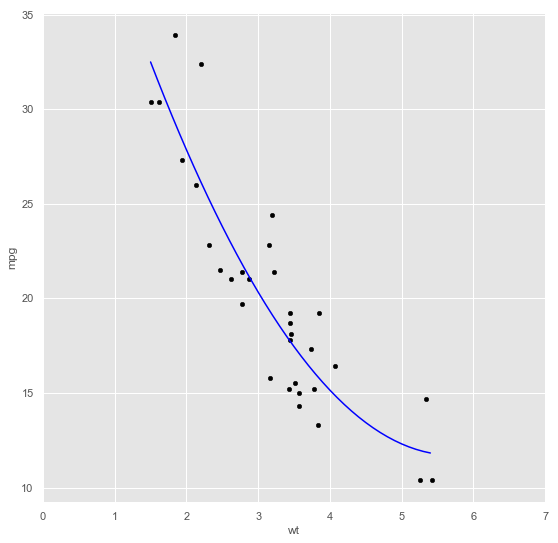

In [24]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue")


The quadratic function seems to fit the data a little better than the linear one. Let's investigate further by using the new model to make predictions on the original data and check the root mean squared error:


In [25]:
preds = poly_model.predict(X=predictors)

RMSE = mean_squared_error( preds , mtcars["mpg"])**0.5
RMSE

2.52330047246108


Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model.


## Multiple Linear Regression

When more x variables are added, a multiple linear regression model is used. 

In [26]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.iloc[:,[2,4,6]],  #cyl, hp, wt
                     y = mtcars['mpg'])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.iloc[:,[2,4,6]], 
                      y = mtcars['mpg'])

38.751787372865536
[-0.94161681 -0.0180381  -3.16697311]


0.8431499832693987

In [27]:
# https://miamioh.instructure.com/courses/38817/pages/regression
datamt = np.matrix(mtcars)
lmm = linear_model.LinearRegression()                                                # Regression object created
wtnp = np.array(mtcars['wt'])                                           # wt variable in an array
cylnp = np.array(mtcars['cyl'])                                         # cyl variable in an array
carbnp = np.array(mtcars['carb'])                                       # carb variable in an array
npc = np.column_stack((cylnp, wtnp, carbnp))                          # Arrays connected into one frame
npcmt = np.matrix(npc)                                                # Connected array made into a matrix
lmFit2 = lmm.fit(npcmt, datamt[:,4])                                  # Fit created
print('Coefficients: \n', lmFit2.coef_, '    ', lmFit2.intercept_)    # Coefficients shown

Coefficients: 
 [[23.18269752  0.14411948 18.28279627]]      [-48.63947381]


The multiple linear regression model produced is <br> hp = 23.1827cyl + 0.1441wt + 18.2828carb - 48.6395 . 

In [28]:
# http://jeremy.kiwi.nz/pythoncourse/2016/03/21/lesson-06-applied.html
# adds more variables
# the output shows an intercept for  variables
mod = smf.ols(formula='hp ~ wt + cyl + carb', data=mtcars)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     hp   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.61
Date:                Wed, 24 Apr 2019   Prob (F-statistic):           8.55e-11
Time:                        23:24:31   Log-Likelihood:                -152.12
No. Observations:                  32   AIC:                             312.2
Df Residuals:                      28   BIC:                             318.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -48.6395     20.055     -2.425      0.0

https://www.kdnuggets.com/2019/03/r-vs-python-data-visualization.html

    sns.set_style() sets the background theme of the plot. "ticks" is the closest to the plot made in R.
    sns.set_context() will apply predefined formatting to the plot to fit the reason or context the visualization is to be used. font_scale=1 is used to set the scaele of the font size for all the text in the graph.
    plt.figure()is a command to control different aspects of the matpltlib graph (as stated before seaborn graphs are just Matplotlib plots under the hood).
    sns.scatterplot()is the command used to pass arguments to create the seaborn style scatterplot.
        x="wt"maps the weight to the x-axis.
        y="hp"maps the horsepower to the y-axis.
        hue="cyl"will fill and color the scatterpoints.
        palette=['red','green','blue']manually overrides the color palette that is set by hueto red, green and blue.
        data="mtcars"allows us to use the data in the dataset.
        style='cyl'assigns shapes to each cyinder category.
        legend='brief'will assign the hue&size.
    sizes=(800,1000)

    controls the minimim and maximum size of the scatterpoints on the plot.
    plt.title() gives the plot its main title. If you are an experienced Matplotlib user or used plt.suptitle() before you know the confusion when using the two together. The arguments are self-explanatory.
    plt.xlabel()will format the x-axis label. I use set_.. to access the class to include the aesthetic properties. This can get cluttered at times but there are many ways to format a seaborn/matplotlib plot. This is useful for after the plot has been created. The plot was already made with sns.scatterplot so now we need to override the default formats in this manner.
    plt.ylabel()works in the exact same way just for the y-axis.
    

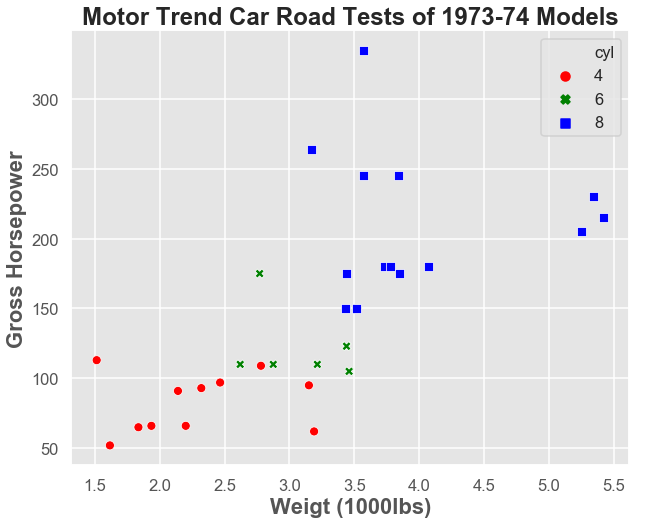

In [29]:
# sns.set_style("ticks")
sns.set_context("talk")
 #sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(10,8)) #plt.figure(figsize=(width,height))
sns.scatterplot(x="wt", y="hp", hue='cyl', palette=['red','green','blue'],
                    data=mtcars, style='cyl', legend='brief', sizes=(800,1000)
                   )
plt.title('Motor Trend Car Road Tests of 1973-74 Models', fontsize=24, fontweight='bold')
plt.xlabel("Weigt (1000lbs)").set_fontsize('22')
plt.xlabel("Weigt (1000lbs)").set_fontweight("bold")
plt.ylabel("Gross Horsepower").set_fontsize('22')
plt.ylabel("Gross Horsepower").set_fontweight("bold");

https://www.kdnuggets.com/2019/03/r-vs-python-data-visualization.html
    
    Faceting in Seaborn requires a new plot to be created. There are a number of ways to do it and sns.relplot() is one such way.

    sns.set()will set the default Seaborn theme into the Python environment and it can also be used to override the default parameters as we see with rc={'figure.figsize':(20,20)}
    sns.relplot()has many of the same parameters discussed above and here we will discuss the new ones as this plot is geared towards faceting.
        col="gear" specifies which column in the mtcars dataset to use for faceting.
        col_wrap=3 specifies the placement of the plots. In this case, the plots will be placed in 3 columns. It will be in one row since the number of rows were not specified but this can be done if needed.
        aspect=0.6 is a control for the size of the plot. I suggest reading the documentation on this as it can become confusing to explain at this point.
    g.fig.suptitle()creates the title for the plot.
        position=(0.5,1.05)is an interesting argument because it controls the position of the title. Even small changes can drastically change the position of the title.
    g.set_xlabels & g.set_ylabels will work as previously discussed.


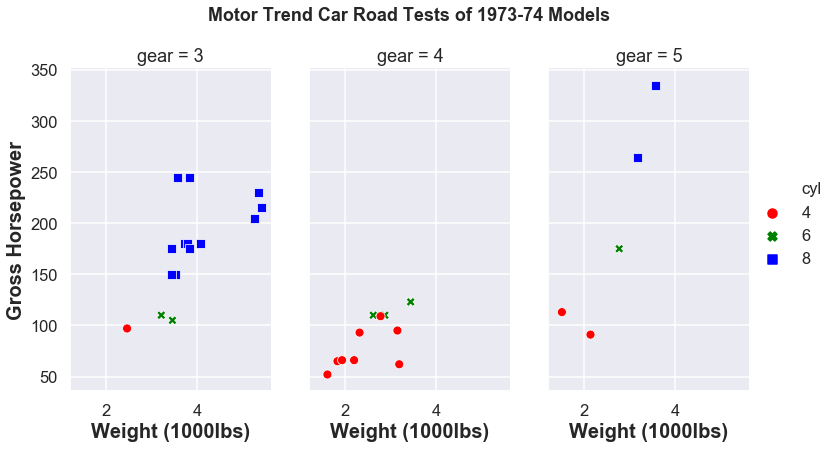

In [30]:
# https://www.kdnuggets.com/2019/03/r-vs-python-data-visualization.html
sns.set(rc={'figure.figsize':(20,20)})
#sns.set_style("ticks")       #  "ticks" is the closest to the plot made in R.
sns.set_context("talk")

g = sns.relplot(x="wt", y="hp", hue='cyl', palette=['red','green','blue'],
                  data=mtcars, col='gear', col_wrap=3,
                  height=6, aspect=0.6, style='cyl', sizes=(800,1000))

g.fig.suptitle('Motor Trend Car Road Tests of 1973-74 Models' ,position=(0.5,1.05), fontweight='bold', size=18)
g.set_xlabels("Weight (1000lbs)",fontweight='bold', size=20)
g.set_ylabels("Gross Horsepower",fontweight='bold', size=20);

Text(0.5, 1.0, 'Line graphs with differet color')

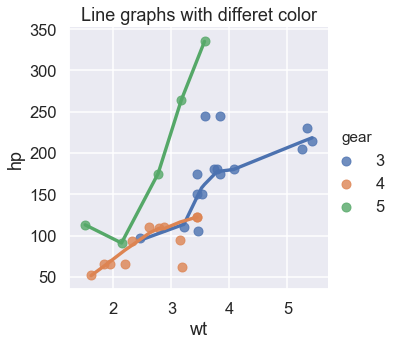

In [31]:
g = sns.lmplot(x="wt", y="hp", hue="gear", data=mtcars, lowess=True)
plt.title('Line graphs with differet color')

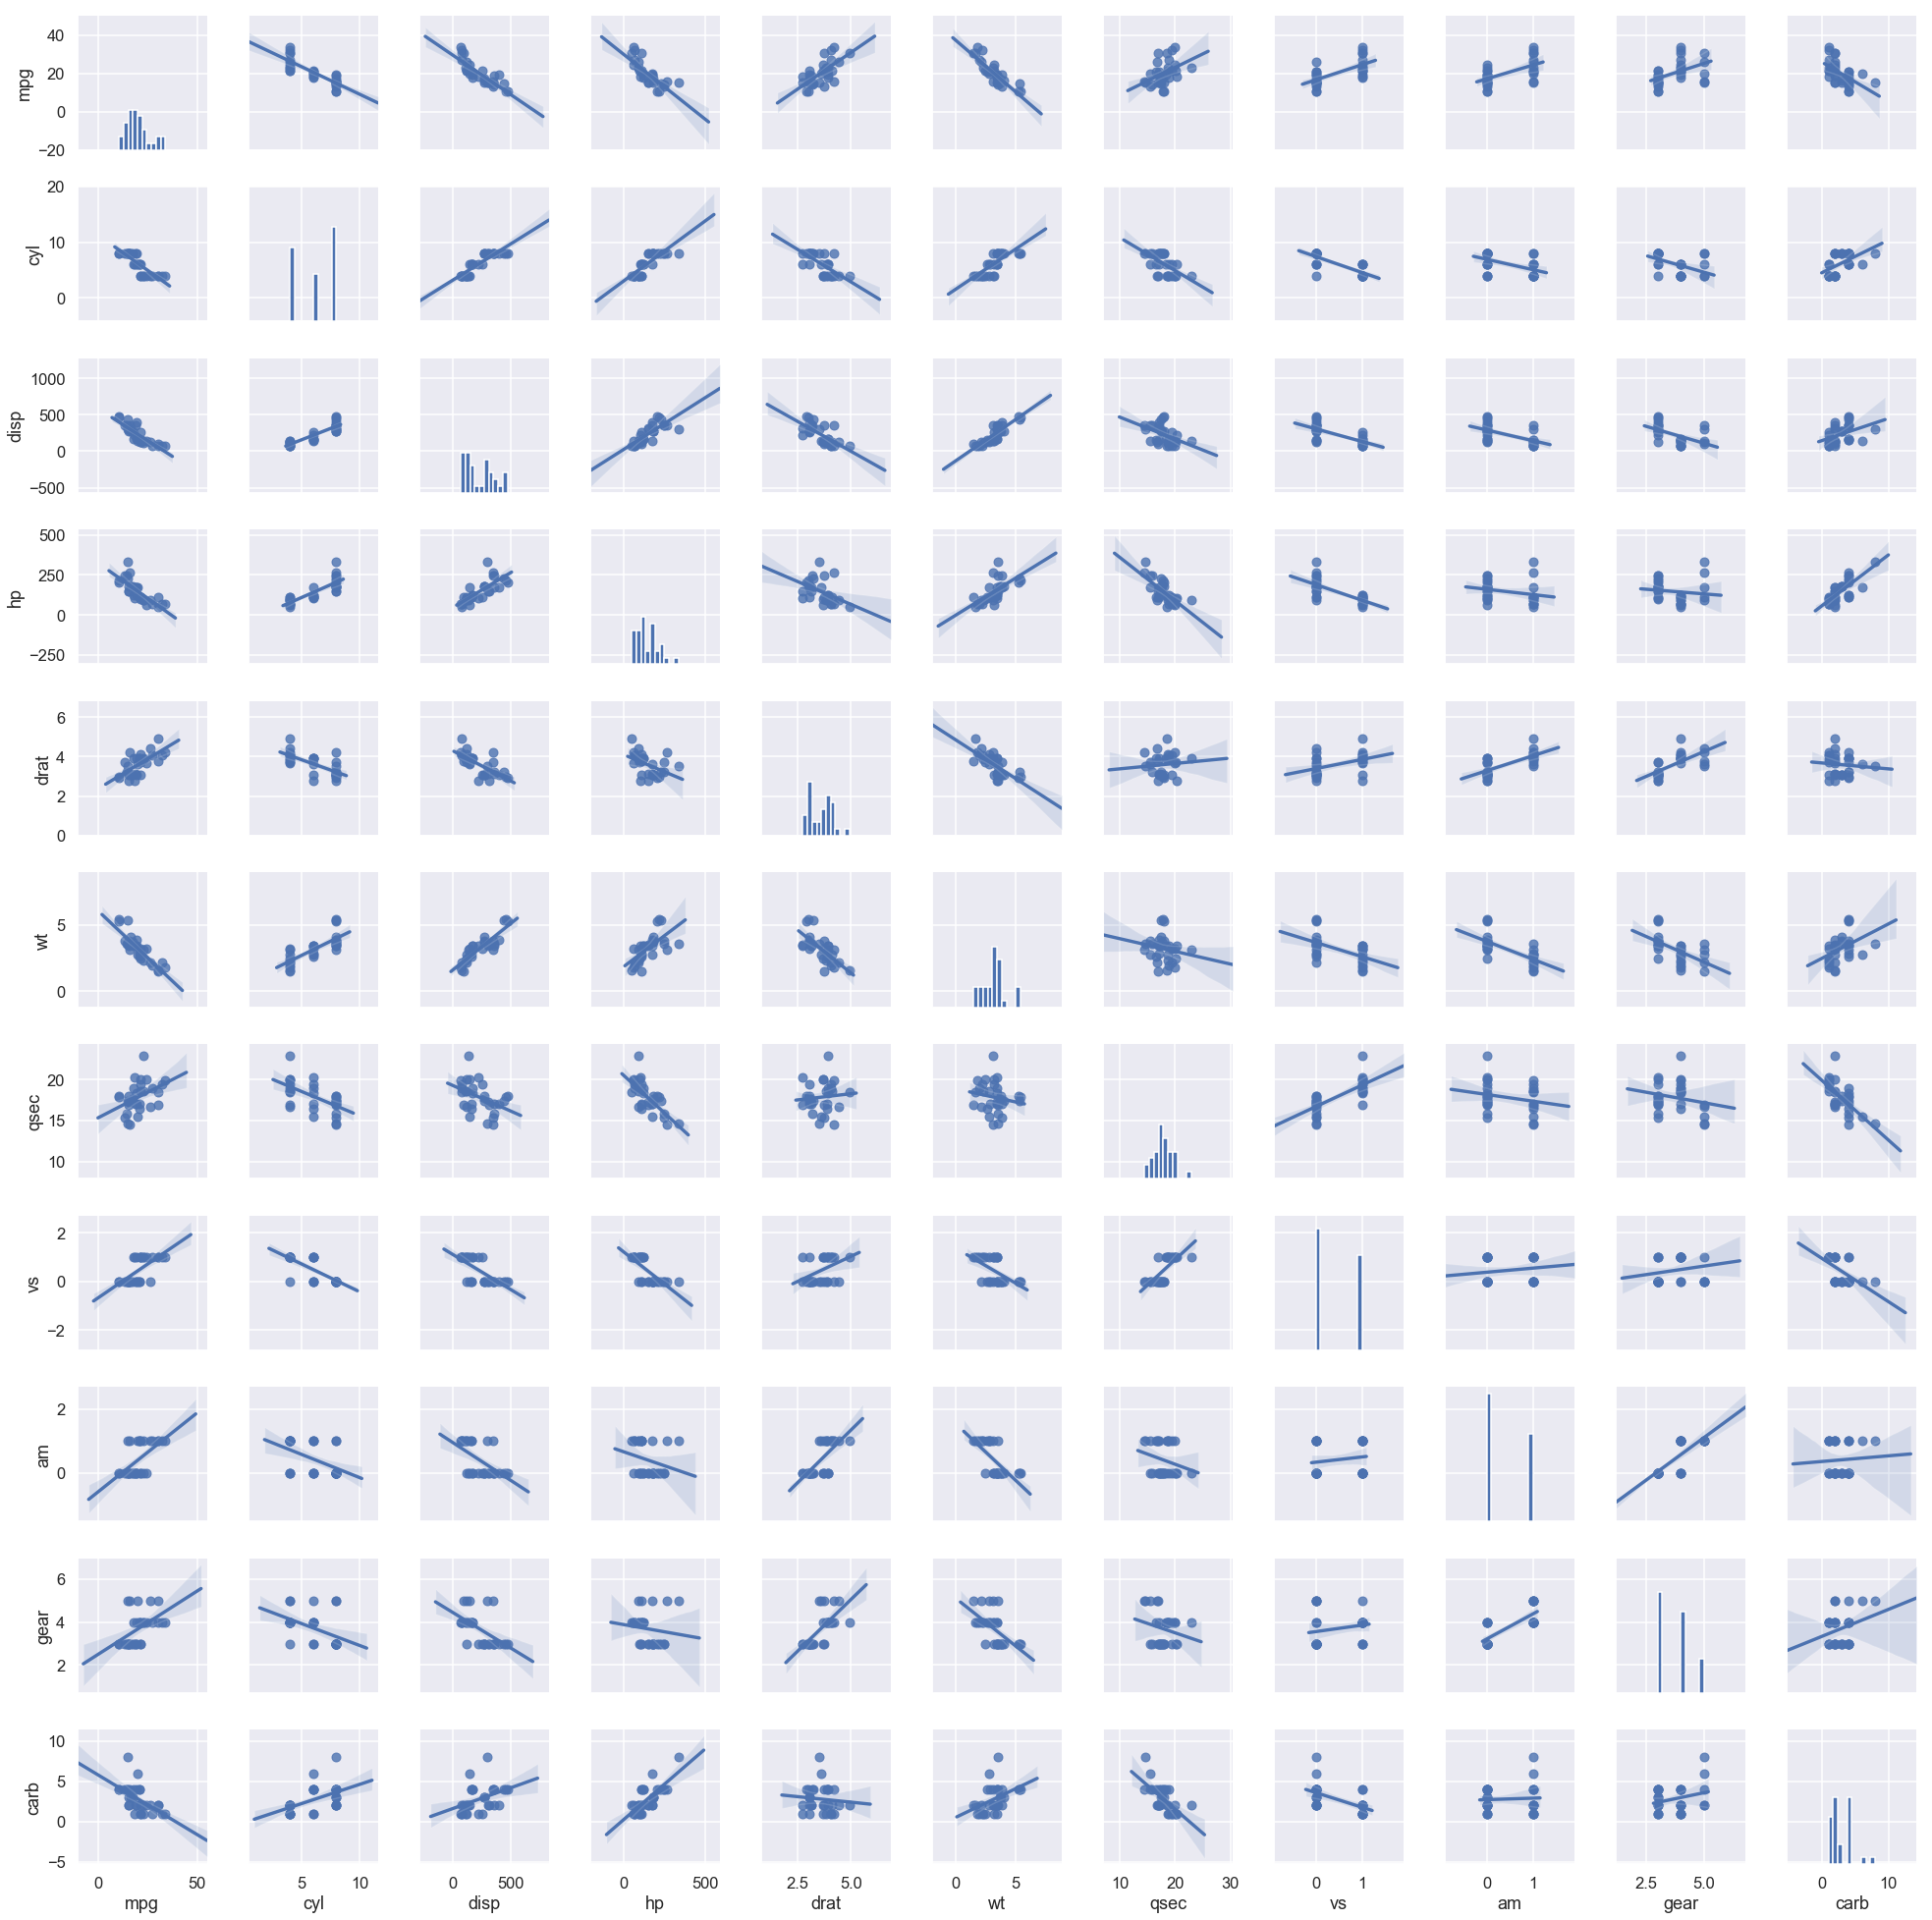

In [32]:
#Scatterplot Matrix
sns.pairplot(mtcars, kind='reg', diag_kind='hist', dropna=True)

In [33]:
# Find all correlations with the score and sort 
correlations_data = mtcars.corr()['mpg'].sort_values()
correlations_data

wt     -0.867659
cyl    -0.852162
disp   -0.847551
hp     -0.776168
carb   -0.550925
qsec    0.418684
gear    0.480285
am      0.599832
vs      0.664039
drat    0.681172
mpg     1.000000
Name: mpg, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


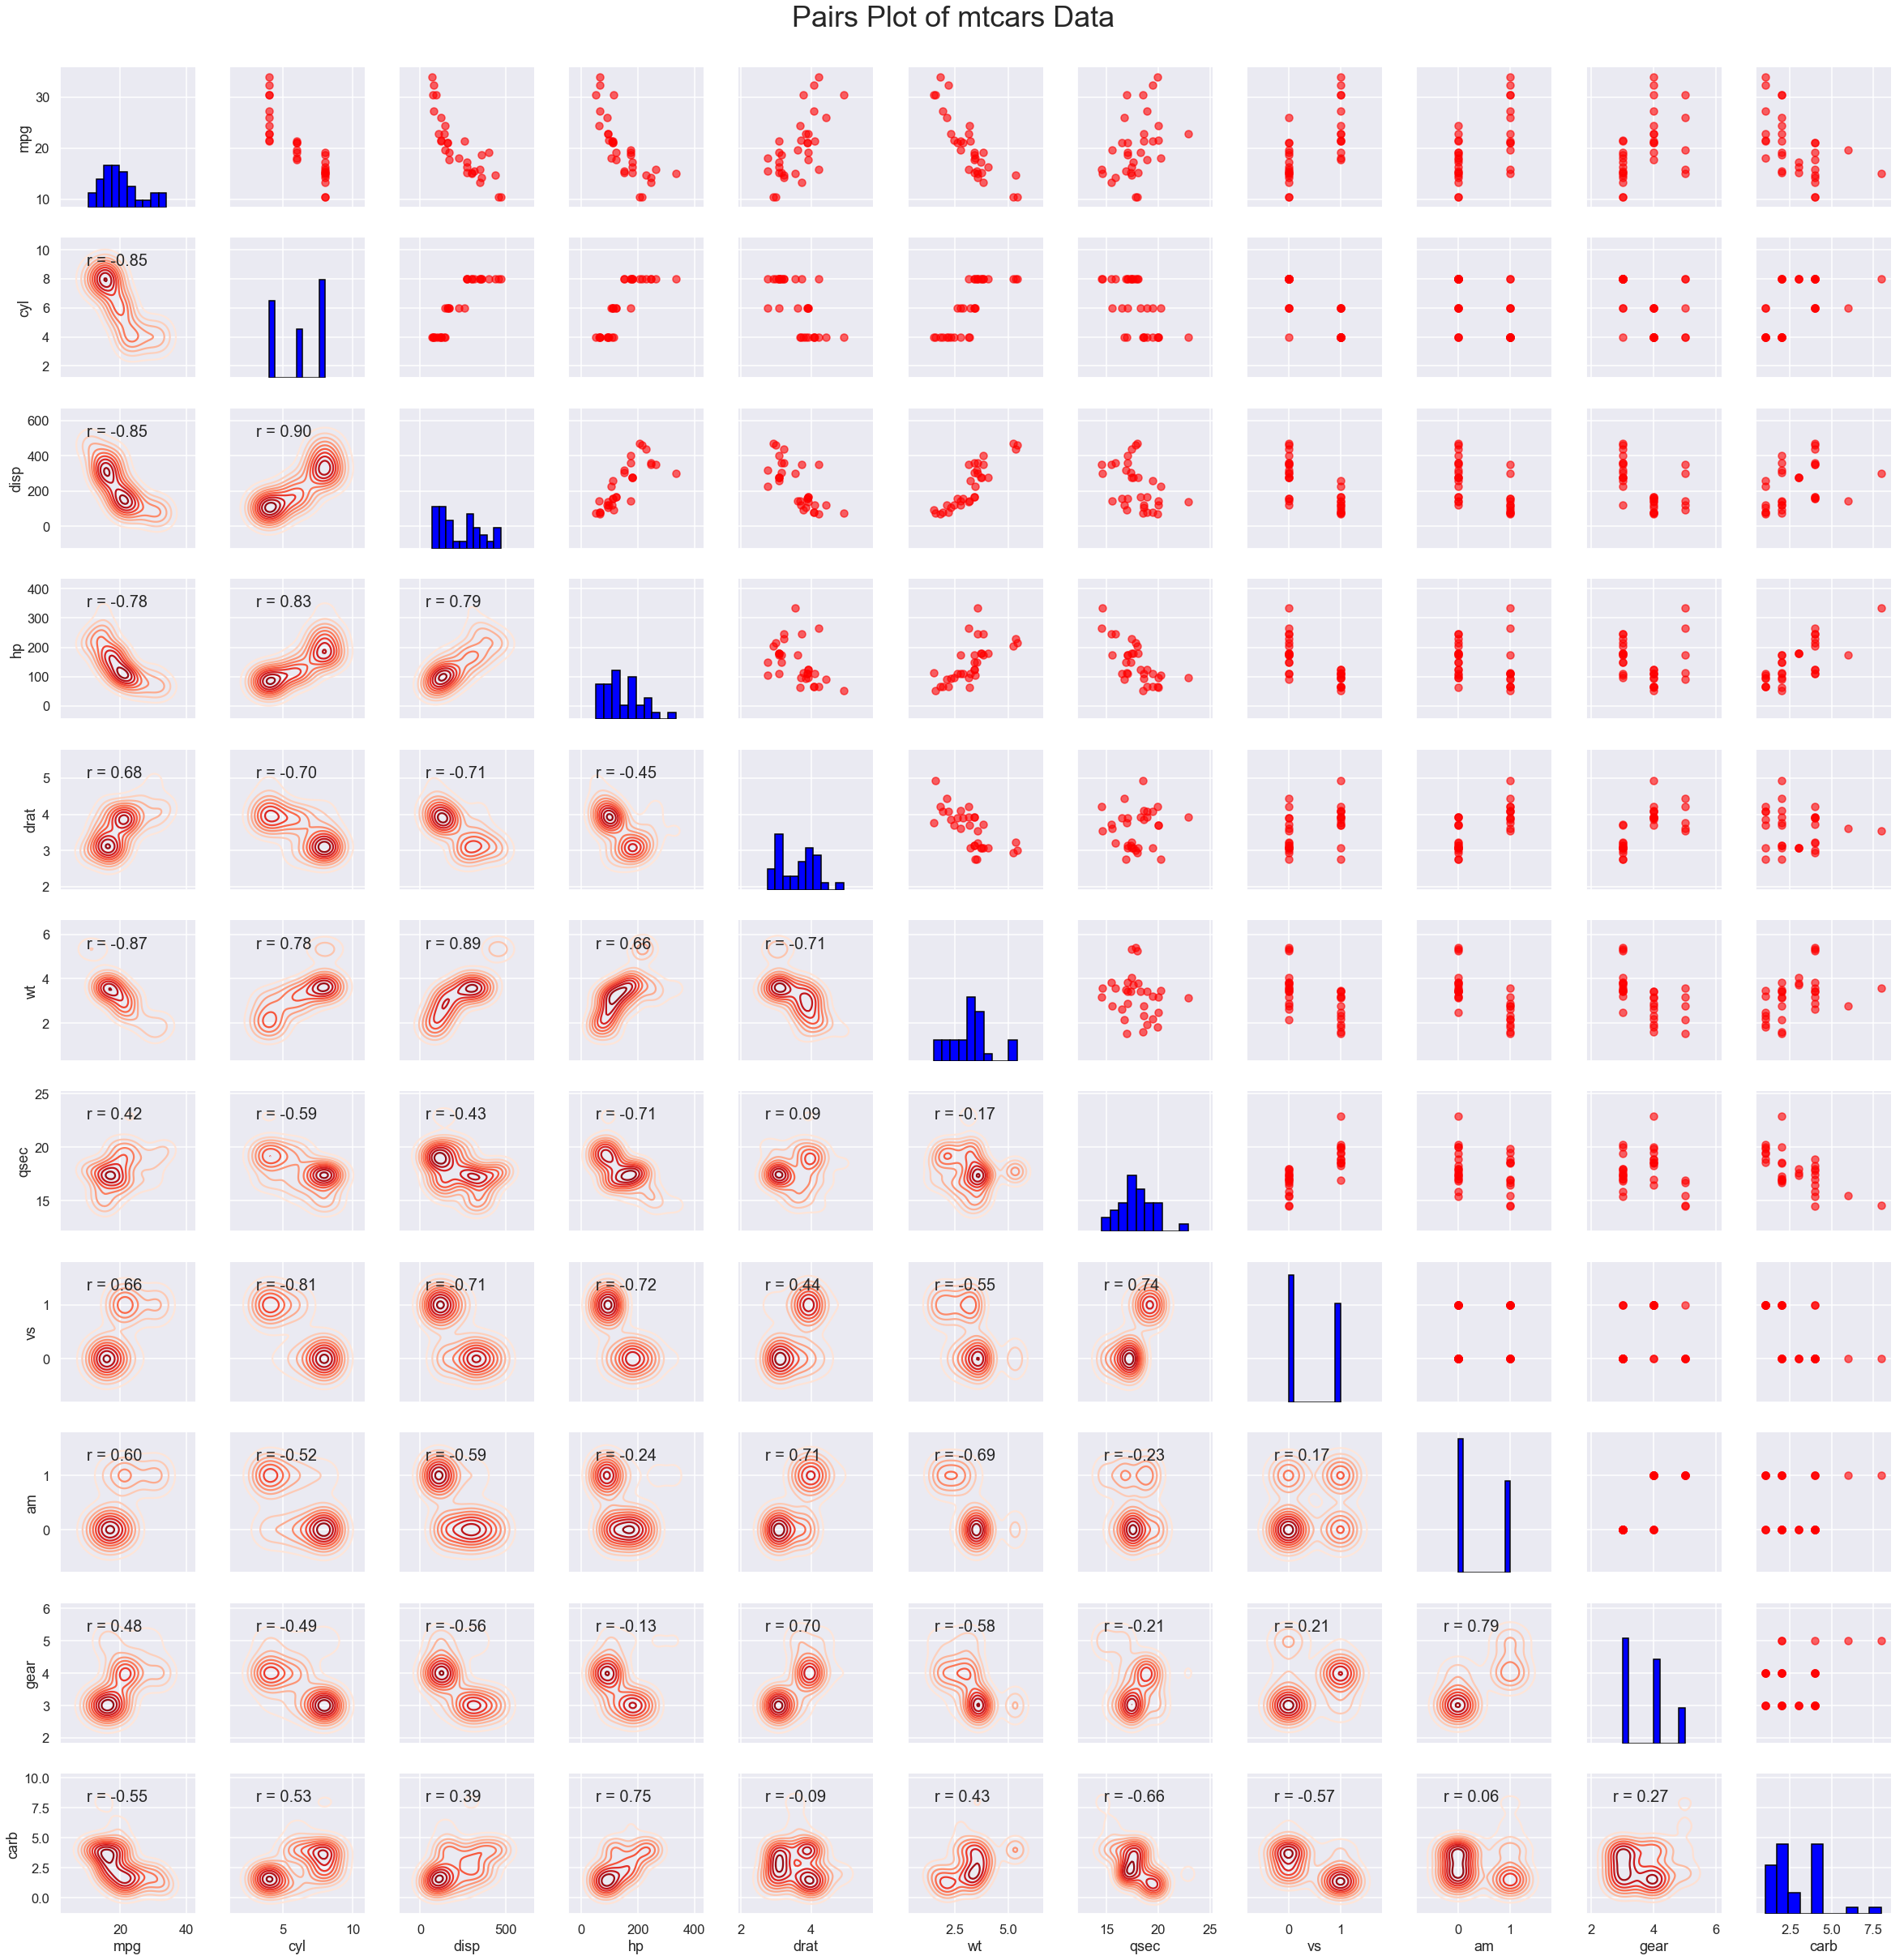

In [34]:
# https://hakin9.org/a-complete-machine-learning-project-walk-through-in-python-part-one-by-will-koehrsen/
# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = mtcars, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of mtcars Data', size = 36, y = 1.02);

In [35]:
# common post hoc-test is Tukey's test. You can carry out Tukey's test using the pairwise_tukeyhsd() function in the statsmodels.stats.multicomp library: 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(mtcars.mpg, mtcars.am, alpha=0.05)

tukey.summary()              # See test summary

group1,group2,meandiff,lower,upper,reject
0,1,7.2449,3.6415,10.8484,True


# To implement PCA in python

In [36]:
# https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X = mtcars.loc[:,['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']].values

#Scaling the values
X = scale(X)
pca = PCA(n_components=9)  
pca.fit(X)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print (var1)

[ 62.84  85.97  91.57  94.51  96.55  97.93  99.1   99.75 100.  ]


Text(0, 0.5, 'cumulative explained variance')

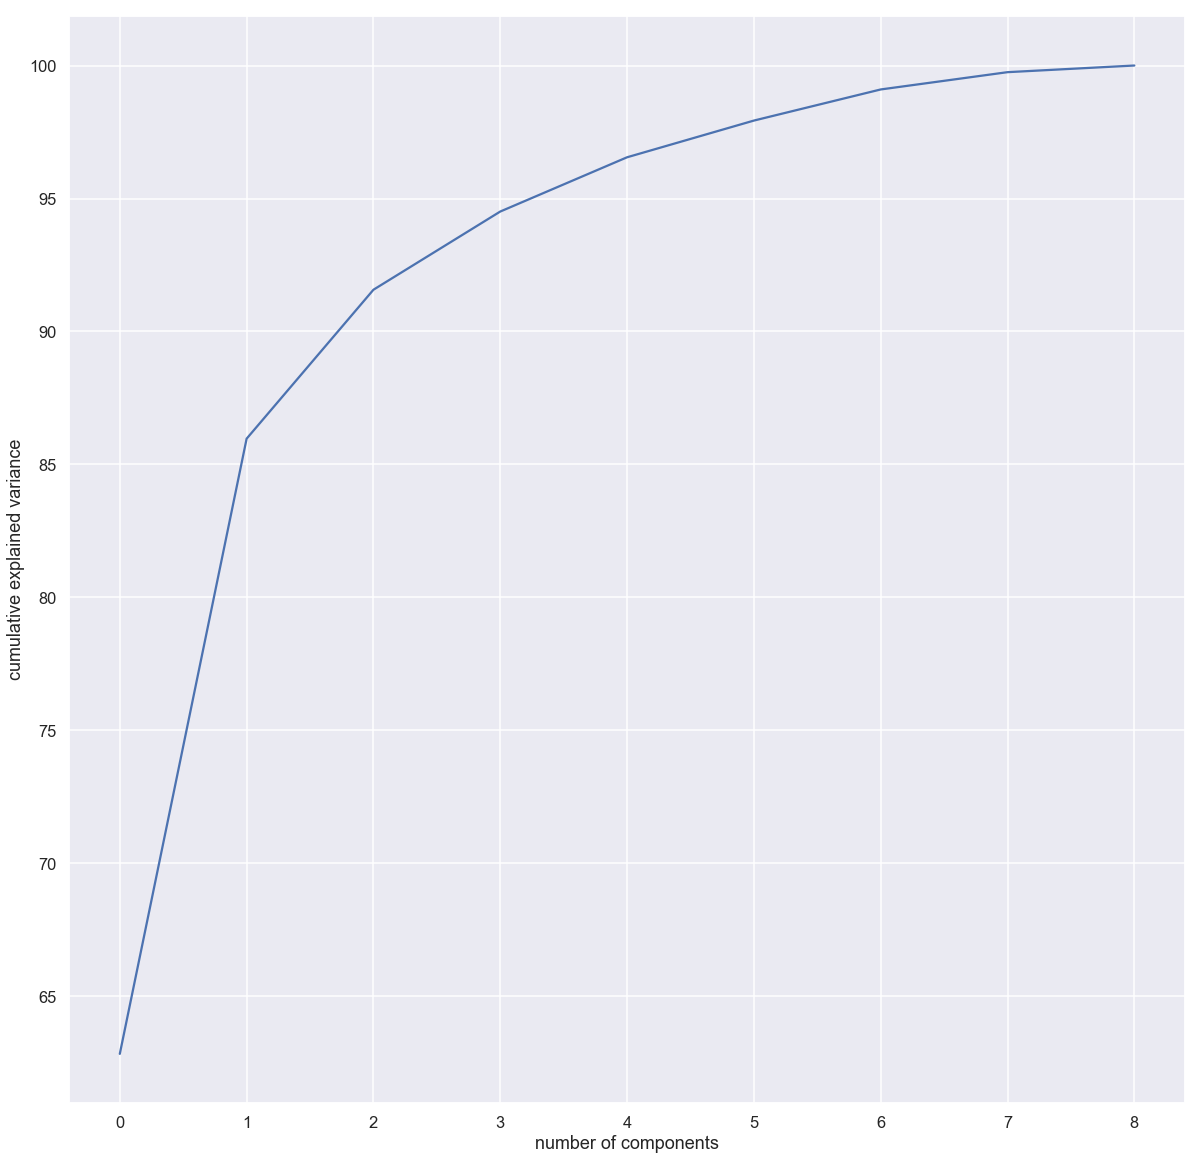

In [37]:
plt.plot(var1)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [38]:
#Looking at above plot I'm taking 3 variables
pca = PCA(n_components=3)
pca.fit(X)
X1=pca.fit_transform(X)

print (X1)

[[ 0.67485176  1.19222391 -0.20758652]
 [ 0.64739389  0.99257693  0.11255035]
 [ 2.33653412 -0.33181502 -0.21351216]
 [ 0.21874167 -2.00844107 -0.33474004]
 [-1.61236724 -0.84198902 -1.04952147]
 [-0.05039885 -2.48583323  0.11356629]
 [-2.75782987  0.36683014 -0.66249404]
 [ 2.07640796 -0.81345226  0.86257262]
 [ 2.3317907  -1.32649137  1.99998225]
 [ 0.38864206  0.59041962  0.90050481]
 [ 0.37239188  0.41879267  1.16698842]
 [-1.91482537 -0.7357065  -0.20934282]
 [-1.69781116 -0.72586714 -0.33166409]
 [-1.80535629 -0.85462822 -0.08694857]
 [-3.70798697 -0.96325813  0.89729006]
 [-3.76970673 -0.85617849  0.94722105]
 [-3.38527779 -0.48825039  0.68135019]
 [ 3.50760397 -0.43963118 -0.22965904]
 [ 3.91645757  0.71975052 -0.23033732]
 [ 3.91656488 -0.39340688 -0.25896813]
 [ 1.93421725 -1.59772645  0.06726358]
 [-1.83288975 -1.15224322 -1.02388941]
 [-1.48827419 -0.99340808 -0.77907305]
 [-2.64298174  0.77719959 -0.49697832]
 [-1.90423467 -0.99482361 -0.91224326]
 [ 3.19868255 -0.2593413 

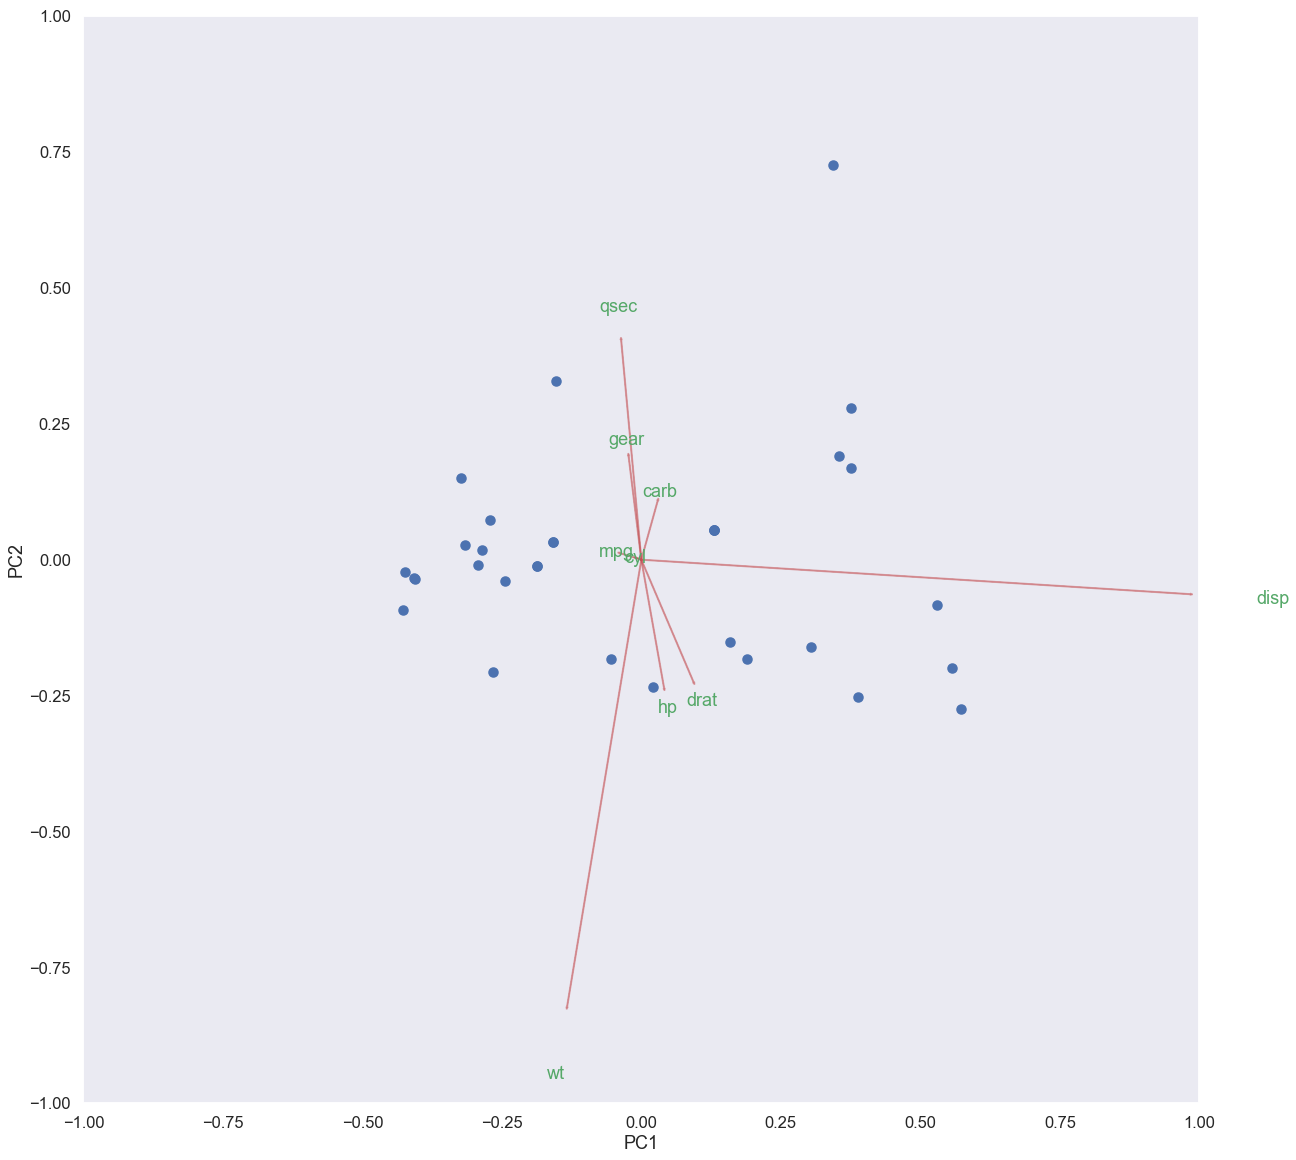

In [46]:
# creating a biplot
features = ['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']
data = pd.DataFrame(mtcars, columns=['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb'])
pca=PCA()
#pca = PCA(n_components=2).fit(data)
#reduced_data = pca.transform(data)
#pca_samples = pca.transform(data)
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
principalComponents = pca.fit_transform(data)


def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
biplot(principalComponents,pca.components_,1,2,features)
plt.show()
